# House Prices: Advanced Regression Techniques
## Predict sales prices and practice feature engineering, RFs, and gradient boosting

#### Step 1: Download data from kaggle, clean and analyze (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)
#### Step 2: By Supervised learning the data and using advance regression techniques, get the best model to predict the sales price.
#### Step 3: Use the best model in the unseen data to predict the house prices.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

import xgboost as xgb
from xgboost import XGBRegressor

import lightgbm as lgb
from lightgbm import LGBMRegressor

/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
df= pd.read_csv("train.csv")

In [3]:
test_df = pd.read_csv('test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
df.shape

(1460, 81)

In [5]:
test_df.shape

(1459, 80)

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
df.isnull().values.any()

True

In [9]:
test_df.isnull().values.any()

True

In [10]:
df_null = df.isnull()
df_null.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [11]:
test_df_null = test_df.isnull()
test_df_null.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,True,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,True,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,True,False,False,False,False,False


In [12]:
for column in df_null.columns.values.tolist():
    print(column)
    print (df_null[column].value_counts())
    print("")    

Id
False    1460
Name: Id, dtype: int64

MSSubClass
False    1460
Name: MSSubClass, dtype: int64

MSZoning
False    1460
Name: MSZoning, dtype: int64

LotFrontage
False    1201
True      259
Name: LotFrontage, dtype: int64

LotArea
False    1460
Name: LotArea, dtype: int64

Street
False    1460
Name: Street, dtype: int64

Alley
True     1369
False      91
Name: Alley, dtype: int64

LotShape
False    1460
Name: LotShape, dtype: int64

LandContour
False    1460
Name: LandContour, dtype: int64

Utilities
False    1460
Name: Utilities, dtype: int64

LotConfig
False    1460
Name: LotConfig, dtype: int64

LandSlope
False    1460
Name: LandSlope, dtype: int64

Neighborhood
False    1460
Name: Neighborhood, dtype: int64

Condition1
False    1460
Name: Condition1, dtype: int64

Condition2
False    1460
Name: Condition2, dtype: int64

BldgType
False    1460
Name: BldgType, dtype: int64

HouseStyle
False    1460
Name: HouseStyle, dtype: int64

OverallQual
False    1460
Name: OverallQual, dtype: i

In [13]:
for column in test_df_null.columns.values.tolist():
    print(column)
    print (test_df_null[column].value_counts())
    print("")  

Id
False    1459
Name: Id, dtype: int64

MSSubClass
False    1459
Name: MSSubClass, dtype: int64

MSZoning
False    1455
True        4
Name: MSZoning, dtype: int64

LotFrontage
False    1232
True      227
Name: LotFrontage, dtype: int64

LotArea
False    1459
Name: LotArea, dtype: int64

Street
False    1459
Name: Street, dtype: int64

Alley
True     1352
False     107
Name: Alley, dtype: int64

LotShape
False    1459
Name: LotShape, dtype: int64

LandContour
False    1459
Name: LandContour, dtype: int64

Utilities
False    1457
True        2
Name: Utilities, dtype: int64

LotConfig
False    1459
Name: LotConfig, dtype: int64

LandSlope
False    1459
Name: LandSlope, dtype: int64

Neighborhood
False    1459
Name: Neighborhood, dtype: int64

Condition1
False    1459
Name: Condition1, dtype: int64

Condition2
False    1459
Name: Condition2, dtype: int64

BldgType
False    1459
Name: BldgType, dtype: int64

HouseStyle
False    1459
Name: HouseStyle, dtype: int64

OverallQual
False    1459

In [14]:
#dealing with missing values
avg_LotFrontage = df["LotFrontage"].astype("float").mean(axis=0)
print("Average of LotFrontage:", avg_LotFrontage)

Average of LotFrontage: 70.04995836802665


In [15]:
t_avg_LotFrontage = test_df["LotFrontage"].astype("float").mean(axis=0)
print("Average of LotFrontage:", t_avg_LotFrontage)

Average of LotFrontage: 68.58035714285714


In [16]:
df["LotFrontage"].replace(np.nan, avg_LotFrontage, inplace=True)

In [17]:
test_df["LotFrontage"].replace(np.nan, t_avg_LotFrontage, inplace=True)

In [18]:
#drop all column with lots of missing data
#Alley,FireplaceQu #PoolQC #Fence #MiscFeature
df.drop(["Alley","FireplaceQu","PoolQC","Fence","MiscFeature"], axis=1, inplace=True)

In [19]:
test_df.drop(["Alley","FireplaceQu","PoolQC","Fence","MiscFeature"], axis=1, inplace=True)

In [20]:
df.shape

(1460, 76)

In [21]:
test_df.shape

(1459, 75)

In [22]:
df["MasVnrType"].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

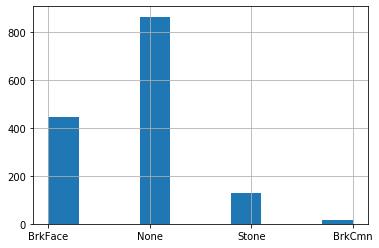

In [23]:
df["MasVnrType"].hist()

In [24]:
df["MasVnrType"].replace(np.nan, "None", inplace=True)

In [25]:
test_df["MasVnrType"].replace(np.nan, "None", inplace=True)

In [26]:
avg_MasVnrArea = df["MasVnrArea"].astype("float").mean(axis=0)
print("Average of MasVnrArea:", avg_MasVnrArea)
df["MasVnrArea"].replace(np.nan, avg_MasVnrArea, inplace=True)

Average of MasVnrArea: 103.68526170798899


In [27]:
t_avg_MasVnrArea = test_df["MasVnrArea"].astype("float").mean(axis=0)
test_df["MasVnrArea"].replace(np.nan, t_avg_MasVnrArea, inplace=True)

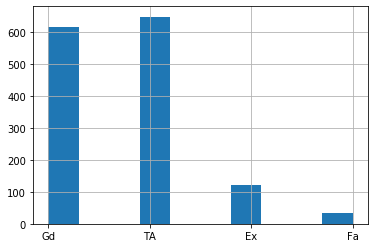

In [28]:
df["BsmtQual"].hist()

In [29]:
df["BsmtQual"].replace(np.nan, "Uk", inplace=True)

In [30]:
test_df["BsmtQual"].replace(np.nan, "Uk", inplace=True)

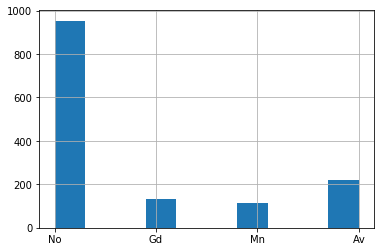

In [31]:
df["BsmtExposure"].hist()

In [32]:
df["BsmtExposure"].replace(np.nan, "No", inplace=True)

In [33]:
test_df["BsmtExposure"].replace(np.nan, "No", inplace=True)

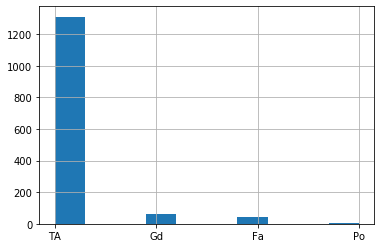

In [34]:
df["BsmtCond"].hist()

In [35]:
df["BsmtCond"].replace(np.nan, "TA", inplace=True)

In [36]:
test_df["BsmtCond"].replace(np.nan, "TA", inplace=True)

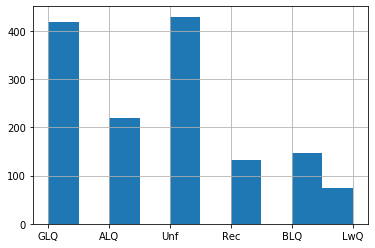

In [37]:
df["BsmtFinType1"].hist()

In [38]:
df["BsmtFinType1"].replace(np.nan, "Uk", inplace=True)

In [39]:
test_df["BsmtFinType1"].replace(np.nan, "Uk", inplace=True)

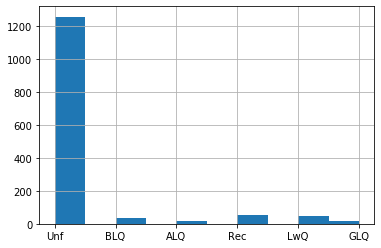

In [40]:
df["BsmtFinType2"].hist()

In [41]:
df["BsmtFinType2"].replace(np.nan, "Unf", inplace=True)

In [42]:
test_df["BsmtFinType2"].replace(np.nan, "Unf", inplace=True)

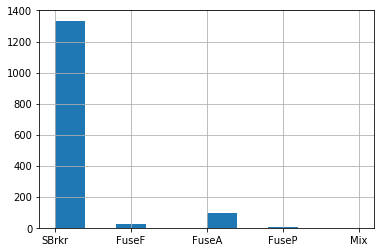

In [43]:
df["Electrical"].hist()

In [44]:
df["Electrical"].replace(np.nan, "SBrkr", inplace=True)

In [45]:
test_df["Electrical"].replace(np.nan, "SBrkr", inplace=True)

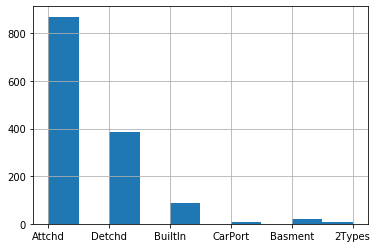

In [46]:
df["GarageType"].hist()

In [47]:
df["GarageType"].replace(np.nan, "Attchd", inplace=True)

In [48]:
test_df["GarageType"].replace(np.nan, "Attchd", inplace=True)

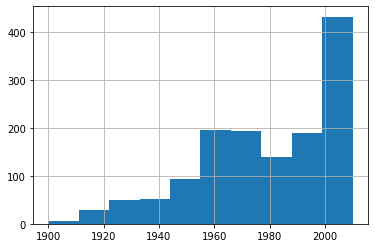

In [49]:
df["GarageYrBlt"].hist()

In [50]:
df["GarageYrBlt"].replace(np.nan,df["GarageYrBlt"].mean() , inplace=True)

In [51]:
test_df["GarageYrBlt"].replace(np.nan,df["GarageYrBlt"].mean() , inplace=True)

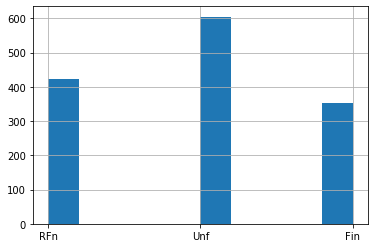

In [52]:
df["GarageFinish"].hist()

In [53]:
df["GarageFinish"].replace(np.nan, "Unf", inplace=True)

In [54]:
test_df["GarageFinish"].replace(np.nan, "Unf", inplace=True)

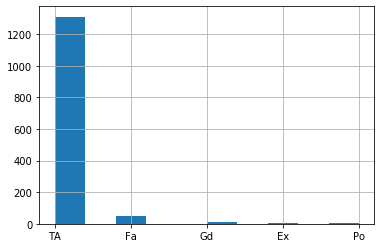

In [55]:
df["GarageQual"].hist()

In [56]:
df["GarageQual"].replace(np.nan, "TA", inplace=True)

In [57]:
test_df["GarageQual"].replace(np.nan, "TA", inplace=True)

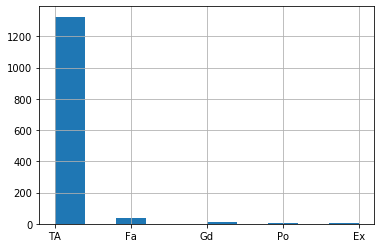

In [58]:
df["GarageCond"].hist()

In [59]:
df["GarageCond"].replace(np.nan, "TA", inplace=True)

In [60]:
test_df["GarageCond"].replace(np.nan, "TA", inplace=True)

In [61]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [62]:
df.GarageCond.unique()

array(['TA', 'Fa', 'Gd', 'Po', 'Ex'], dtype=object)

In [63]:
df_null.isnull().values.any()

False

In [64]:
test_df.isnull().values.any()

True

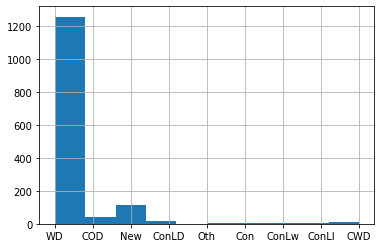

In [65]:
test_df["SaleType"].hist()

In [66]:
test_df["SaleType"].replace(np.nan, "WD", inplace=True)

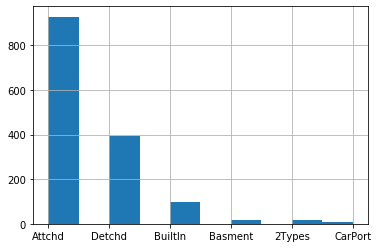

In [67]:
test_df["GarageType"].hist()

In [68]:
test_df["Functional"].replace(np.nan, "Typ", inplace=True)

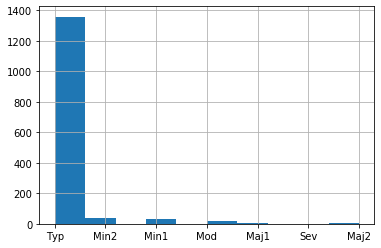

In [69]:
test_df["Functional"].hist()

In [70]:
test_df["Functional"].replace(np.nan, "Typ", inplace=True)

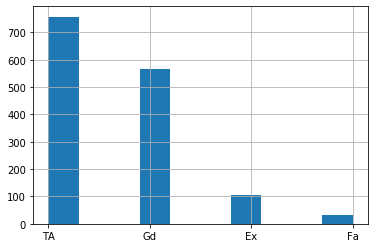

In [71]:
test_df["KitchenQual"].hist()

In [72]:
test_df["KitchenQual"].replace(np.nan, "TA", inplace=True)

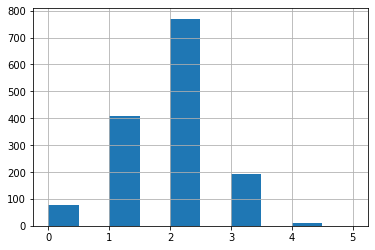

In [73]:
test_df["GarageCars"].hist()

In [74]:
test_df["GarageCars"].replace(np.nan,df["GarageCars"].mean() , inplace=True)

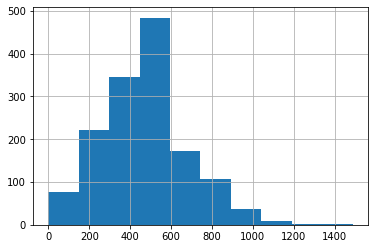

In [75]:
test_df["GarageArea"].hist()

In [76]:
test_df["GarageArea"].replace(np.nan,df["GarageArea"].mean() , inplace=True)

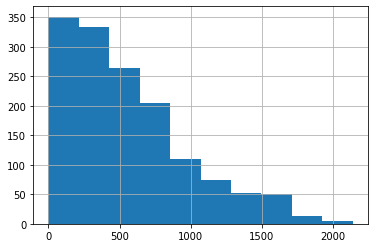

In [77]:
test_df["BsmtUnfSF"].hist()
test_df["BsmtUnfSF"].replace(np.nan,df["BsmtUnfSF"].mean() , inplace=True)

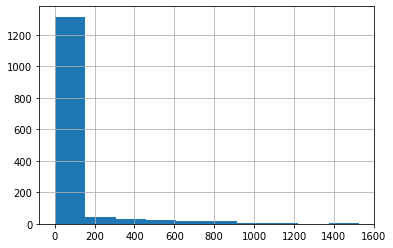

In [78]:
test_df["BsmtFinSF2"].replace(np.nan,df["BsmtFinSF2"].mean() , inplace=True)
test_df["BsmtFinSF2"].hist()

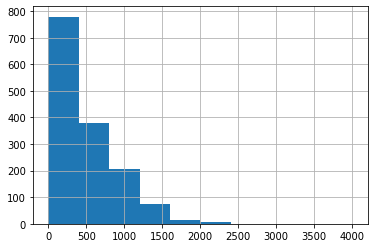

In [79]:
test_df["BsmtFinSF1"].replace(np.nan,df["BsmtFinSF1"].mean() , inplace=True)
test_df["BsmtFinSF1"].hist()

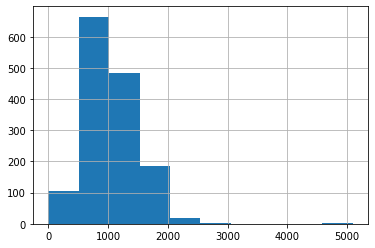

In [80]:
test_df["TotalBsmtSF"].replace(np.nan,df["TotalBsmtSF"].mean() , inplace=True)
test_df["TotalBsmtSF"].hist()

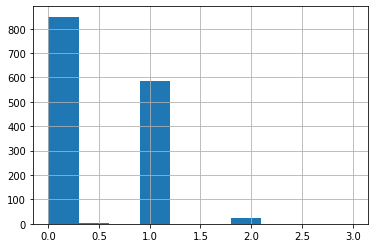

In [81]:
test_df["BsmtFullBath"].replace(np.nan,df["BsmtFullBath"].mean() , inplace=True)
test_df["BsmtFullBath"].hist()

In [82]:
test_df["BsmtFullBath"].dtype

dtype('float64')

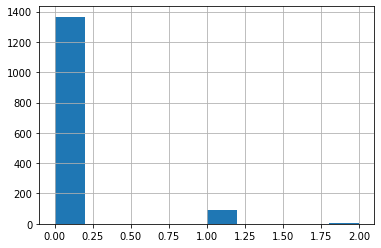

In [83]:
test_df["BsmtHalfBath"].replace(np.nan, 0, inplace=True)
test_df["BsmtHalfBath"].hist()

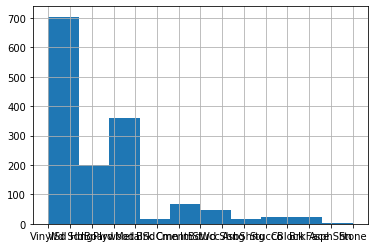

In [84]:
test_df["Exterior2nd"].hist()
test_df["Exterior2nd"].replace(np.nan, "VinylSd", inplace=True)

In [85]:
test_df["Exterior2nd"].value_counts()

VinylSd    511
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
AsphShn      1
Stone        1
Name: Exterior2nd, dtype: int64

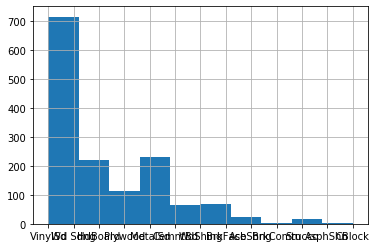

In [86]:
test_df["Exterior1st"].replace(np.nan, "VinylSd", inplace=True)
test_df["Exterior1st"].hist()

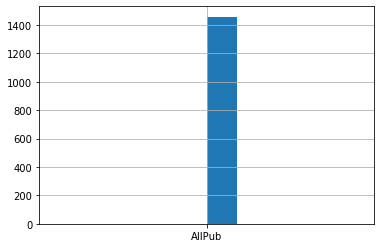

In [87]:
test_df["Utilities"].replace(np.nan, "AllPub", inplace=True)
test_df["Utilities"].hist()

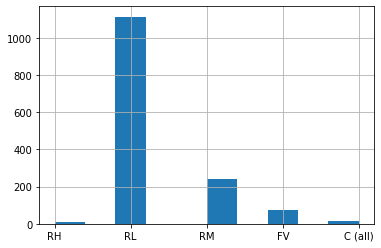

In [88]:
test_df["MSZoning"].hist()
test_df["MSZoning"].replace(np.nan, "RL", inplace=True)

In [89]:
test_df_null = test_df.isnull()

In [90]:
for column in test_df_null.columns.values.tolist():
    print(column)
    print (test_df_null[column].value_counts())
    print("")  

Id
False    1459
Name: Id, dtype: int64

MSSubClass
False    1459
Name: MSSubClass, dtype: int64

MSZoning
False    1459
Name: MSZoning, dtype: int64

LotFrontage
False    1459
Name: LotFrontage, dtype: int64

LotArea
False    1459
Name: LotArea, dtype: int64

Street
False    1459
Name: Street, dtype: int64

LotShape
False    1459
Name: LotShape, dtype: int64

LandContour
False    1459
Name: LandContour, dtype: int64

Utilities
False    1459
Name: Utilities, dtype: int64

LotConfig
False    1459
Name: LotConfig, dtype: int64

LandSlope
False    1459
Name: LandSlope, dtype: int64

Neighborhood
False    1459
Name: Neighborhood, dtype: int64

Condition1
False    1459
Name: Condition1, dtype: int64

Condition2
False    1459
Name: Condition2, dtype: int64

BldgType
False    1459
Name: BldgType, dtype: int64

HouseStyle
False    1459
Name: HouseStyle, dtype: int64

OverallQual
False    1459
Name: OverallQual, dtype: int64

OverallCond
False    1459
Name: OverallCond, dtype: int64

YearBuilt


In [91]:
df.isnull().values.any()

False

In [92]:
test_df.isnull().values.any()

False

In [93]:
df_target=df[['Id','SalePrice']]
df_target.head()

,Id,SalePrice
0,1,208500
1,2,181500
2,3,223500
3,4,140000
4,5,250000


In [94]:
df.drop(['SalePrice'], axis=1, inplace = True)

In [95]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,12,2008,WD,Normal


In [96]:
df.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1460.000000,1460.000000,1460,1460.000000,1460.000000,1460,1460,1460,1460,1460,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460
unique,NaN,NaN,5,NaN,NaN,2,4,4,2,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,6
top,NaN,NaN,RL,NaN,NaN,Pave,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WD,Normal
freq,NaN,NaN,1151,NaN,NaN,1454,925,1311,1459,1052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1267,1198
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,NaN,NaN
std,421.610009,42.300571,NaN,22.024023,9981.264932,NaN,NaN,NaN,NaN,NaN,...,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,NaN,NaN
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,NaN,NaN
25%,365.750000,20.000000,NaN,60.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,NaN,NaN
50%,730.500000,50.000000,NaN,70.049958,9478.500000,NaN,NaN,NaN,NaN,NaN,...,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,NaN,NaN
75%,1095.250000,70.000000,NaN,79.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,NaN,NaN


In [97]:
#df["SalePrice"].isnull().values.any()

In [98]:
#df["SalePrice"].hist()

In [99]:
df.isnull().values.any()

False

In [100]:
df.describe(include ='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1460.000000,1460.000000,1460,1460.000000,1460.000000,1460,1460,1460,1460,1460,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460
unique,NaN,NaN,5,NaN,NaN,2,4,4,2,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,6
top,NaN,NaN,RL,NaN,NaN,Pave,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WD,Normal
freq,NaN,NaN,1151,NaN,NaN,1454,925,1311,1459,1052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1267,1198
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,NaN,NaN
std,421.610009,42.300571,NaN,22.024023,9981.264932,NaN,NaN,NaN,NaN,NaN,...,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,NaN,NaN
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,NaN,NaN
25%,365.750000,20.000000,NaN,60.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,NaN,NaN
50%,730.500000,50.000000,NaN,70.049958,9478.500000,NaN,NaN,NaN,NaN,NaN,...,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,NaN,NaN
75%,1095.250000,70.000000,NaN,79.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,NaN,NaN


In [101]:
test_df.describe(include ='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1459.000000,1459.000000,1459,1459.000000,1459.000000,1459,1459,1459,1459,1459,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459,1459
unique,NaN,NaN,5,NaN,NaN,2,4,4,1,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,6
top,NaN,NaN,RL,NaN,NaN,Pave,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WD,Normal
freq,NaN,NaN,1118,NaN,NaN,1453,934,1311,1459,1081,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1259,1204
mean,2190.000000,57.378341,NaN,68.580357,9819.161069,NaN,NaN,NaN,NaN,NaN,...,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705,NaN,NaN
std,421.321334,42.746880,NaN,20.561228,4955.517327,NaN,NaN,NaN,NaN,NaN,...,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740,NaN,NaN
min,1461.000000,20.000000,NaN,21.000000,1470.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,NaN,NaN
25%,1825.500000,20.000000,NaN,60.000000,7391.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,NaN,NaN
50%,2190.000000,50.000000,NaN,68.580357,9399.000000,NaN,NaN,NaN,NaN,NaN,...,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,NaN,NaN
75%,2554.500000,70.000000,NaN,78.000000,11517.500000,NaN,NaN,NaN,NaN,NaN,...,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,NaN,NaN


In [102]:
df.shape

(1460, 75)

In [103]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 75, dtype: object

In [104]:
df.index

RangeIndex(start=0, stop=1460, step=1)

In [105]:
df_id=df[['Id']]
df_id.head()

,Id
0,1
1,2
2,3
3,4
4,5


In [106]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,12,2008,WD,Normal


In [107]:
df_cat=df.loc[:, df.dtypes == object]
df_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [108]:
df_cat=df.drop(['MSSubClass','LotFrontage','LotArea', 'OverallQual','OverallCond','YearBuilt','YearRemodAdd',
                'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
                'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
                'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF',
                'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold'],
              axis=1)

In [109]:
df_cat.head()

,Id,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [110]:
df_cats=pd.merge(df_cat, right=df_target)

In [111]:
df_cats.head()

,Id,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,208500
1,2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,181500
2,3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,223500
3,4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml,140000
4,5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,250000


In [112]:
df_cats.shape

(1460, 40)

In [113]:
df_cats.dtypes

Id                int64
MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
SalePrice         int64
dtype: object

In [114]:
df_cats.describe(include='object')

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,...,5,4,7,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,...,1335,735,1360,951,686,1392,1407,1340,1267,1198


In [115]:
df_cats.corr()

,Id,SalePrice
Id,1.000000,-0.021917
SalePrice,-0.021917,1.000000


In [116]:
#Anova for ExterQual
df_cats['ExterQual'].value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [117]:
df_gptest=df_cats[['ExterQual','SalePrice']]

In [118]:
group_test=df_gptest[['ExterQual','SalePrice']].groupby(['ExterQual'])

In [119]:
group_test.get_group('TA')['SalePrice']

1       181500
3       140000
5       143000
7       200000
8       129900
         ...  
1452    145000
1453     84500
1455    175000
1456    210000
1458    142125
Name: SalePrice, Length: 906, dtype: int64

In [120]:
f_val, p_val =stats.f_oneway(group_test.get_group('TA')['SalePrice'],group_test.get_group('Gd')['SalePrice'],
                            group_test.get_group('Ex')['SalePrice'],group_test.get_group('Fa')['SalePrice'])
print("ANOVA: F =",f_val,"P =",p_val )

ANOVA: F = 443.33483141504627 P = 1.4395510967787893e-204


In [121]:
f_val, p_val =stats.f_oneway(group_test.get_group('TA')['SalePrice'],group_test.get_group('Gd')['SalePrice'])
                            
print("ANOVA: F =",f_val,"P =",p_val )

ANOVA: F = 820.4173593043989 P = 3.092910404268895e-142


In [122]:
f_val, p_val =stats.f_oneway(
                            group_test.get_group('Ex')['SalePrice'],group_test.get_group('Fa')['SalePrice'])
print("ANOVA: F =",f_val,"P =",p_val )

ANOVA: F = 77.4264124484184 P = 1.269033485648265e-12


In [123]:
f_val, p_val =stats.f_oneway(group_test.get_group('TA')['SalePrice']
                            ,group_test.get_group('Fa')['SalePrice'])
print("ANOVA: F =",f_val,"P =",p_val )

ANOVA: F = 24.31595739057615 P = 9.701587725573386e-07


In [124]:
df_cont=df.loc[:, df.dtypes != 'object']
df_cont.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008


In [125]:
df_conts=pd.merge(df_cont,right=df_target)
df_conts.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [126]:
df_conts.shape

(1460, 38)

In [127]:
df_conts.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [128]:
#df_misc=df.loc[:, df.dtypes != int]
#df_misc.head()

In [129]:
#df_misc.dtypes

In [130]:
df_conts.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,...,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050199,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,...,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.475241
BsmtFinSF1,-0.005024,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


(0, 791307.0345571568)

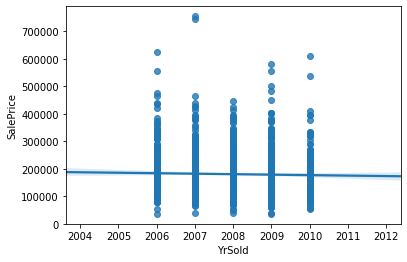

In [131]:
sns.regplot(x='YrSold', y ='SalePrice', data = df_conts)
plt.ylim(0,)

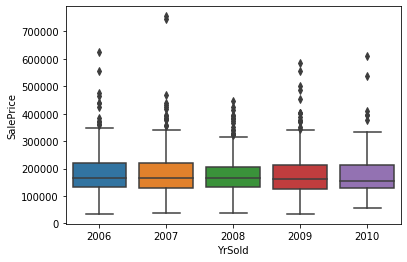

In [132]:
sns.boxplot(x='YrSold', y ='SalePrice', data = df_conts)

In [133]:
pearson_coef, p_value = stats.pearsonr(df_conts['YrSold'], df_conts['SalePrice'])
print("Pearson Correlation: ", pearson_coef, "P-value: ", p_value)

Pearson Correlation:  -0.028922585168730332 P-value:  0.26941319328103863


In [134]:
pearson_coef, p_value = stats.pearsonr(df_conts['MSSubClass'], df_conts['SalePrice'])
print("Pearson Correlation: ", pearson_coef, "P-value: ", p_value)

Pearson Correlation:  -0.08428413512659519 P-value:  0.0012664716847503312


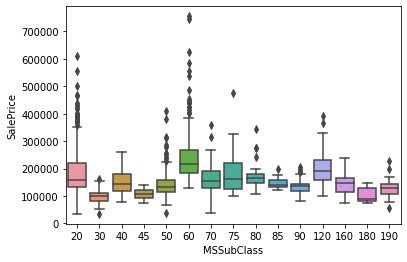

In [135]:
sns.boxplot(x='MSSubClass', y ='SalePrice', data = df_conts)

In [136]:
pearson_coef, p_value = stats.pearsonr(df_conts['OverallCond'], df_conts['SalePrice'])
print("Pearson Correlation: ", pearson_coef, "P-value: ", p_value)

Pearson Correlation:  -0.07785589404867803 P-value:  0.0029123512679174826


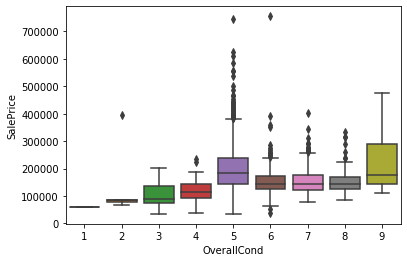

In [137]:
sns.boxplot(x='OverallCond', y ='SalePrice', data = df_conts)

In [138]:
pearson_coef, p_value = stats.pearsonr(df_conts['BsmtFinSF2'], df_conts['SalePrice'])
print("Pearson Correlation: ", pearson_coef, "P-value: ", p_value)

Pearson Correlation:  -0.01137812145021515 P-value:  0.663998650834577


In [139]:
pearson_coef, p_value = stats.pearsonr(df_conts['LowQualFinSF'], df_conts['SalePrice'])
print("Pearson Correlation: ", pearson_coef, "P-value: ", p_value)

Pearson Correlation:  -0.025606130000679544 P-value:  0.32820730984074886


In [140]:
pearson_coef, p_value = stats.pearsonr(df_conts['BsmtHalfBath'], df_conts['SalePrice'])
print("Pearson Correlation: ", pearson_coef, "P-value: ", p_value)

Pearson Correlation:  -0.016844154297359012 P-value:  0.5201536357280931


In [141]:
pearson_coef, p_value = stats.pearsonr(df_conts['3SsnPorch'], df_conts['SalePrice'])
print("Pearson Correlation: ", pearson_coef, "P-value: ", p_value)

Pearson Correlation:  0.04458366533574841 P-value:  0.08858170358062883


In [142]:
pearson_coef, p_value = stats.pearsonr(df_conts['PoolArea'], df_conts['SalePrice'])
print("Pearson Correlation: ", pearson_coef, "P-value: ", p_value)

Pearson Correlation:  0.09240354949187318 P-value:  0.0004073489601198664


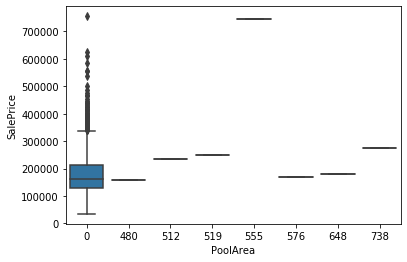

In [143]:
sns.boxplot(x='PoolArea', y ='SalePrice', data = df_conts)

In [144]:
pearson_coef, p_value = stats.pearsonr(df_conts['MiscVal'], df_conts['SalePrice'])
print("Pearson Correlation: ", pearson_coef, "P-value: ", p_value)

Pearson Correlation:  -0.021189579640303255 P-value:  0.4184863494082891


In [145]:
pearson_coef, p_value = stats.pearsonr(df_conts['MoSold'], df_conts['SalePrice'])
print("Pearson Correlation: ", pearson_coef, "P-value: ", p_value)

Pearson Correlation:  0.04643224522381934 P-value:  0.0761275785060908


In [146]:
#OverallQual
pearson_coef, p_value = stats.pearsonr(df_conts['OverallQual'], df_conts['SalePrice'])
print("Pearson Correlation: ", pearson_coef, "P-value: ", p_value)

Pearson Correlation:  0.790981600583805 P-value:  2.185675268e-313


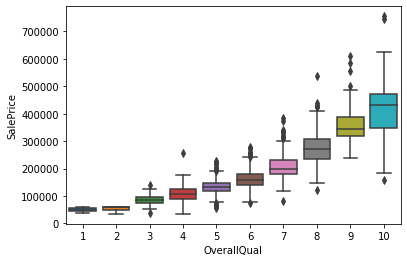

In [147]:
sns.boxplot(x='OverallQual', y ='SalePrice', data = df_conts)

In [148]:
#columns to drop
#YrSold,MSSubClass,OverallCond,BsmtFinSF2,LowQualFinSF,BsmtHalfBath,3SsnPorch,PoolArea,MiscVal,MoSold

In [149]:
df_conts.drop(['YrSold','PoolArea','MiscVal','MoSold','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','3SsnPorch'],
             axis=1, inplace=True)
df_conts.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,8,0,2003.0,2,548,0,61,0,0,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,6,1,1976.0,2,460,298,0,0,0,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,6,1,2001.0,2,608,0,42,0,0,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,7,1,1998.0,3,642,0,35,272,0,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,9,1,2000.0,3,836,192,84,0,0,250000


In [150]:
test_df.drop(['YrSold','PoolArea','MiscVal','MoSold','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','3SsnPorch'],
             axis=1, inplace=True)

In [151]:
df_conts.shape

(1460, 30)

In [152]:
df_cats["LandSlope"]=df_cats.LandSlope.astype('category').cat.codes
df_cats["Neighborhood"]=df_cats.Neighborhood.astype('category').cat.codes
df_cats["Condition1"]=df_cats.Condition1.astype('category').cat.codes
df_cats["Condition2"]=df_cats.Condition2.astype('category').cat.codes
df_cats["BldgType"]=df_cats.BldgType.astype('category').cat.codes

df_cats["HouseStyle"]=df_cats.HouseStyle.astype('category').cat.codes
df_cats["RoofStyle"]=df_cats.RoofStyle.astype('category').cat.codes
df_cats["RoofMatl"]=df_cats.RoofMatl.astype('category').cat.codes
df_cats["Electrical"]=df_cats.Electrical.astype('category').cat.codes
df_cats["SaleCondition"]=df_cats.SaleCondition.astype('category').cat.codes

df_cats["Exterior1st"]=df_cats.Exterior1st.astype('category').cat.codes
df_cats["Exterior2nd"]=df_cats.Exterior2nd.astype('category').cat.codes
df_cats["ExterQual"]=df_cats.ExterQual.astype('category').cat.codes
df_cats["ExterCond"]=df_cats.ExterCond.astype('category').cat.codes
df_cats["Heating"]=df_cats.Heating.astype('category').cat.codes

df_cats["HeatingQC"]=df_cats.HeatingQC.astype('category').cat.codes
df_cats["CentralAir"]=df_cats.CentralAir.astype('category').cat.codes
df_cats["KitchenQual"]=df_cats.KitchenQual.astype('category').cat.codes
df_cats["Functional"]=df_cats.Functional.astype('category').cat.codes
df_cats["PavedDrive"]=df_cats.PavedDrive.astype('category').cat.codes

df_cats["MasVnrType"]=df_cats.MasVnrType.astype('category').cat.codes
df_cats["GarageQual"]=df_cats.GarageQual.astype('category').cat.codes
df_cats["GarageFinish"]=df_cats.GarageFinish.astype('category').cat.codes
df_cats["GarageType"]=df_cats.GarageType.astype('category').cat.codes
df_cats["GarageCond"]=df_cats.GarageCond.astype('category').cat.codes

df_cats["BsmtFinType2"]=df_cats.BsmtFinType2.astype('category').cat.codes
df_cats["BsmtFinType1"]=df_cats.BsmtFinType1.astype('category').cat.codes
df_cats["BsmtCond"]=df_cats.BsmtCond.astype('category').cat.codes
df_cats["BsmtExposure"]=df_cats.BsmtExposure.astype('category').cat.codes
df_cats["BsmtQual"]=df_cats.BsmtQual.astype('category').cat.codes

df_cats["MSZoning"]=df_cats.MSZoning.astype('category').cat.codes
df_cats["SaleType"]=df_cats.SaleType.astype('category').cat.codes
df_cats["Street"]=df_cats.Street.astype('category').cat.codes
df_cats["LotShape"]=df_cats.LotShape.astype('category').cat.codes
df_cats["LandContour"]=df_cats.LandContour.astype('category').cat.codes

df_cats["LotConfig"]=df_cats.LotConfig.astype('category').cat.codes
df_cats["Utilities"]=df_cats.Utilities.astype('category').cat.codes
df_cats["Foundation"]=df_cats.Foundation.astype('category').cat.codes

In [153]:
test_df["Neighborhood"]=test_df.Neighborhood.astype('category').cat.codes
test_df["Condition1"]=test_df.Condition1.astype('category').cat.codes
test_df["BldgType"]=test_df.BldgType.astype('category').cat.codes

test_df["HouseStyle"]=test_df.HouseStyle.astype('category').cat.codes
test_df["RoofStyle"]=test_df.RoofStyle.astype('category').cat.codes
test_df["RoofMatl"]=test_df.RoofMatl.astype('category').cat.codes
test_df["Electrical"]=test_df.Electrical.astype('category').cat.codes
test_df["SaleCondition"]=test_df.SaleCondition.astype('category').cat.codes

test_df["Exterior1st"]=test_df.Exterior1st.astype('category').cat.codes
test_df["Exterior2nd"]=test_df.Exterior2nd.astype('category').cat.codes
test_df["ExterQual"]=test_df.ExterQual.astype('category').cat.codes
test_df["ExterCond"]=test_df.ExterCond.astype('category').cat.codes
test_df["Heating"]=test_df.Heating.astype('category').cat.codes

test_df["HeatingQC"]=test_df.HeatingQC.astype('category').cat.codes
test_df["CentralAir"]=test_df.CentralAir.astype('category').cat.codes
test_df["KitchenQual"]=test_df.KitchenQual.astype('category').cat.codes
test_df["Functional"]=test_df.Functional.astype('category').cat.codes
test_df["PavedDrive"]=test_df.PavedDrive.astype('category').cat.codes

test_df["GarageQual"]=test_df.GarageQual.astype('category').cat.codes
test_df["GarageFinish"]=test_df.GarageFinish.astype('category').cat.codes
test_df["GarageType"]=test_df.GarageType.astype('category').cat.codes
test_df["GarageCond"]=test_df.GarageCond.astype('category').cat.codes

test_df["BsmtFinType1"]=test_df.BsmtFinType1.astype('category').cat.codes
test_df["BsmtCond"]=test_df.BsmtCond.astype('category').cat.codes
test_df["BsmtExposure"]=test_df.BsmtExposure.astype('category').cat.codes
test_df["BsmtQual"]=test_df.BsmtQual.astype('category').cat.codes

test_df["MSZoning"]=test_df.MSZoning.astype('category').cat.codes
test_df["SaleType"]=test_df.SaleType.astype('category').cat.codes
test_df["LotShape"]=test_df.LotShape.astype('category').cat.codes

test_df["LotConfig"]=test_df.LotConfig.astype('category').cat.codes
test_df["Foundation"]=test_df.Foundation.astype('category').cat.codes

In [154]:
df_cats.head()

,Id,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,1,3,1,3,3,0,4,0,5,2,...,2,6,1,1,4,4,2,8,4,208500
1,2,3,1,3,3,0,2,0,24,1,...,3,6,1,1,4,4,2,8,4,181500
2,3,3,1,0,3,0,4,0,5,2,...,2,6,1,1,4,4,2,8,4,223500
3,4,3,1,0,3,0,0,0,6,2,...,2,6,5,2,4,4,2,8,0,140000
4,5,3,1,0,3,0,2,0,15,2,...,2,6,1,1,4,4,2,8,4,250000


In [155]:
df_cats.corr()

,Id,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
Id,1.000000,-0.006096,0.008916,0.032122,-0.019659,0.013324,0.049756,0.005847,-0.013735,-0.003815,...,-0.004432,-0.001064,0.000195,-0.011390,-0.003230,-0.018025,0.005971,0.019773,-0.005806,-0.021917
MSZoning,-0.006096,1.000000,0.087654,0.061887,-0.017854,-0.001192,-0.009895,-0.022055,-0.249679,-0.027874,...,0.128976,-0.095722,0.116007,0.167501,-0.150802,-0.083272,-0.100366,0.097437,0.009494,-0.166872
Street,0.008916,0.087654,1.000000,-0.010224,0.115995,0.001682,0.013960,-0.179360,-0.011561,-0.071657,...,-0.025307,-0.016444,0.001517,-0.008277,-0.013853,-0.011950,0.024521,0.014339,0.006064,0.041036
LotShape,0.032122,0.061887,-0.010224,1.000000,0.085434,-0.036101,0.221102,-0.099951,-0.038894,-0.115003,...,0.122182,-0.029321,0.168451,0.231392,-0.093127,-0.067882,-0.113698,-0.000911,-0.038118,-0.255580
LandContour,-0.019659,-0.017854,0.115995,0.085434,1.000000,0.008238,-0.025527,-0.374267,0.019116,0.024801,...,0.030813,0.036113,-0.076679,-0.084288,0.008759,0.004346,0.140921,-0.025754,0.033809,0.015453
Utilities,0.013324,-0.001192,0.001682,-0.036101,0.008238,1.000000,-0.032589,-0.005909,0.046809,-0.000950,...,-0.010717,0.006702,-0.003099,-0.007380,0.005646,0.004870,0.007586,-0.126770,-0.089701,-0.014314
LotConfig,0.049756,-0.009895,0.013960,0.221102,-0.025527,-0.032589,1.000000,-0.007256,-0.036597,0.021457,...,-0.010437,-0.021119,0.011562,0.024764,0.023167,0.031285,-0.045058,0.014325,0.051579,-0.067396
LandSlope,0.005847,-0.022055,-0.179360,-0.099951,-0.374267,-0.005909,-0.007256,1.000000,-0.080405,-0.016762,...,-0.002735,-0.106851,-0.001337,0.025008,0.015266,-0.016590,-0.024538,0.054858,-0.043095,0.051152
Neighborhood,-0.013735,-0.249679,-0.011561,-0.038894,0.019116,0.046809,-0.036597,-0.080405,1.000000,-0.025401,...,-0.128734,0.037694,-0.050995,-0.067240,-0.021100,0.010020,0.040345,-0.036956,0.021867,0.210851
Condition1,-0.003815,-0.027874,-0.071657,-0.115003,0.024801,-0.000950,0.021457,-0.016762,-0.025401,1.000000,...,-0.050028,-0.014877,-0.043308,-0.137571,0.071580,0.022276,0.105864,-0.002338,0.057747,0.091155


In [156]:
#remove from the categorical value
#SaleType,Street,BsmtFinType2,BsmtExposure,BsmtCond,MasVnrType,BldgType,Condition2,LandSlope,Utilities,LandContour

In [157]:
pearson_coef, p_value = stats.pearsonr(df_cats['SaleType'], df_cats['SalePrice'])
print("Pearson Correlation: ", pearson_coef, "P-value: ", p_value)

Pearson Correlation:  -0.05491147712871203 P-value:  0.03590952105114003


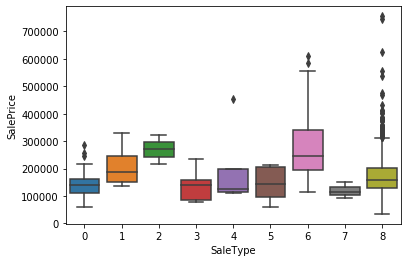

In [158]:
sns.boxplot(x='SaleType', y ='SalePrice', data = df_cats)

In [159]:
pearson_coef, p_value = stats.pearsonr(df_cats['Street'], df_cats['SalePrice'])
print("Pearson Correlation: ", pearson_coef, "P-value: ", p_value)

Pearson Correlation:  0.041035535500049534 P-value:  0.11704860406788947


In [160]:
pearson_coef, p_value = stats.pearsonr(df_cats['BsmtFinType2'], df_cats['SalePrice'])
print("Pearson Correlation: ", pearson_coef, "P-value: ", p_value)

Pearson Correlation:  0.03323475094224374 P-value:  0.20438365619908666


In [161]:
pearson_coef, p_value = stats.pearsonr(df_cats['BsmtExposure'], df_cats['SalePrice'])
print("Pearson Correlation: ", pearson_coef, "P-value: ", p_value)

Pearson Correlation:  -0.29540673824138874 P-value:  8.664620945382935e-31


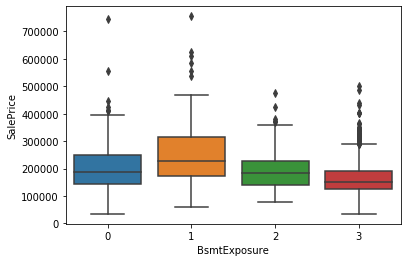

In [162]:
sns.boxplot(x='BsmtExposure', y ='SalePrice', data = df_cats)

In [163]:
pearson_coef, p_value = stats.pearsonr(df_cats['BsmtCond'], df_cats['SalePrice'])
print("Pearson Correlation: ", pearson_coef, "P-value: ", p_value)

Pearson Correlation:  0.052563338099431714 P-value:  0.04463156696293351


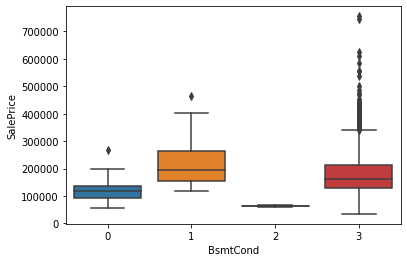

In [164]:
sns.boxplot(x='BsmtCond', y ='SalePrice', data = df_cats)

In [165]:
pearson_coef, p_value = stats.pearsonr(df_cats['MasVnrType'], df_cats['SalePrice'])
print("Pearson Correlation: ", pearson_coef, "P-value: ", p_value)

Pearson Correlation:  0.01821577126165872 P-value:  0.4867512836623357


In [166]:
pearson_coef, p_value = stats.pearsonr(df_cats['BldgType'], df_cats['SalePrice'])
print("Pearson Correlation: ", pearson_coef, "P-value: ", p_value)

Pearson Correlation:  -0.08559060818352945 P-value:  0.0010617926963545315


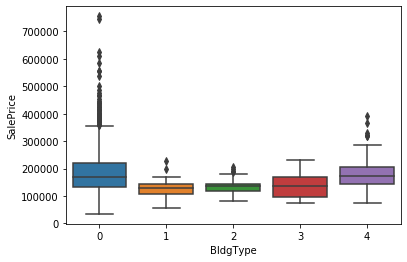

In [167]:
sns.boxplot(x='BldgType', y ='SalePrice', data = df_cats)

In [168]:
pearson_coef, p_value = stats.pearsonr(df_cats['Condition2'], df_cats['SalePrice'])
print("Pearson Correlation: ", pearson_coef, "P-value: ", p_value)

Pearson Correlation:  0.007512734036333046 P-value:  0.77425065100843


In [169]:
pearson_coef, p_value = stats.pearsonr(df_cats['LandSlope'], df_cats['SalePrice'])
print("Pearson Correlation: ", pearson_coef, "P-value: ", p_value)

Pearson Correlation:  0.05115224817946655 P-value:  0.050685853827739866


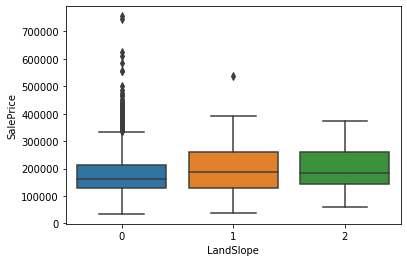

In [170]:
sns.boxplot(x='LandSlope', y ='SalePrice', data = df_cats)

(0, 791307.0345571568)

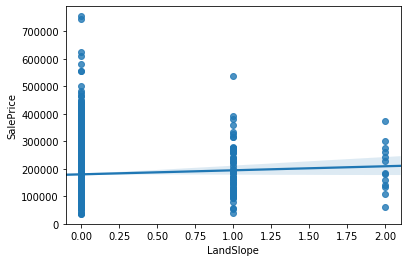

In [171]:
sns.regplot(x='LandSlope', y ='SalePrice', data = df_cats)
plt.ylim(0,)

In [172]:
pearson_coef, p_value = stats.pearsonr(df_cats['Utilities'], df_cats['SalePrice'])
print("Pearson Correlation: ", pearson_coef, "P-value: ", p_value)

Pearson Correlation:  -0.014314296147248771 P-value:  0.5847167739692756


In [173]:
pearson_coef, p_value = stats.pearsonr(df_cats['LandContour'], df_cats['SalePrice'])
print("Pearson Correlation: ", pearson_coef, "P-value: ", p_value)

Pearson Correlation:  0.01545324166096037 P-value:  0.5551926433858244


In [174]:
df_cats.drop(['Street','BsmtFinType2','MasVnrType','Condition2','LandSlope','Utilities','LandContour'],
             axis=1, inplace=True)
df_cats.head()

,Id,MSZoning,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,RoofMatl,...,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,1,3,3,4,5,2,0,5,1,1,...,2,6,1,1,4,4,2,8,4,208500
1,2,3,3,2,24,1,0,2,1,1,...,3,6,1,1,4,4,2,8,4,181500
2,3,3,0,4,5,2,0,5,1,1,...,2,6,1,1,4,4,2,8,4,223500
3,4,3,0,0,6,2,0,5,1,1,...,2,6,5,2,4,4,2,8,0,140000
4,5,3,0,2,15,2,0,5,1,1,...,2,6,1,1,4,4,2,8,4,250000


In [175]:
test_df.drop(['Street','BsmtFinType2','MasVnrType','Condition2','LandSlope','Utilities','LandContour'],
             axis=1, inplace=True)

In [176]:
df_cats.shape

(1460, 33)

df["LandSlope"]=df.LandSlope.astype('category').cat.codes
df["Neighborhood"]=df.Neighborhood.astype('category').cat.codes
df["Condition1"]=df.Condition1.astype('category').cat.codes
df["Condition2"]=df.Condition2.astype('category').cat.codes
df["BldgType"]=df.BldgType.astype('category').cat.codes

df["HouseStyle"]=df.HouseStyle.astype('category').cat.codes
df["RoofStyle"]=df.RoofStyle.astype('category').cat.codes
df["RoofMatl"]=df.RoofMatl.astype('category').cat.codes
df["Electrical"]=df.Electrical.astype('category').cat.codes
df["SaleCondition"]=df.SaleCondition.astype('category').cat.codes

df["Exterior1st"]=df.Exterior1st.astype('category').cat.codes
df["Exterior2nd"]=df.Exterior2nd.astype('category').cat.codes
df["ExterQual"]=df.ExterQual.astype('category').cat.codes
df["ExterCond"]=df.ExterCond.astype('category').cat.codes
df["Heating"]=df.Heating.astype('category').cat.codes

df["HeatingQC"]=df.HeatingQC.astype('category').cat.codes
df["CentralAir"]=df.CentralAir.astype('category').cat.codes
df["KitchenQual"]=df.KitchenQual.astype('category').cat.codes
df["Functional"]=df.Functional.astype('category').cat.codes
df["PavedDrive"]=df.PavedDrive.astype('category').cat.codes

df["MasVnrType"]=df.MasVnrType.astype('category').cat.codes
df["GarageQual"]=df.GarageQual.astype('category').cat.codes
df["GarageFinish"]=df.GarageFinish.astype('category').cat.codes
df["GarageType"]=df.GarageType.astype('category').cat.codes
df["GarageCond"]=df.GarageCond.astype('category').cat.codes

df["BsmtFinType2"]=df.BsmtFinType2.astype('category').cat.codes
df["BsmtFinType1"]=df.BsmtFinType1.astype('category').cat.codes
df["BsmtCond"]=df.BsmtCond.astype('category').cat.codes
df["BsmtExposure"]=df.BsmtExposure.astype('category').cat.codes
df["BsmtQual"]=df.BsmtQual.astype('category').cat.codes

df["MSZoning"]=df.MSZoning.astype('category').cat.codes
df["SaleType"]=df.SaleType.astype('category').cat.codes
df["Street"]=df.Street.astype('category').cat.codes
df["LotShape"]=df.LotShape.astype('category').cat.codes
df["LandContour"]=df.LandContour.astype('category').cat.codes

df["LotConfig"]=df.LotConfig.astype('category').cat.codes
df["Utilities"]=df.Utilities.astype('category').cat.codes
df["Foundation"]=df.Foundation.astype('category').cat.codes

df_cat=df.loc[:, df.dtypes == object]
df_cat.head()

df.describe(include ='all')

np.where((df.applymap(type)==object))

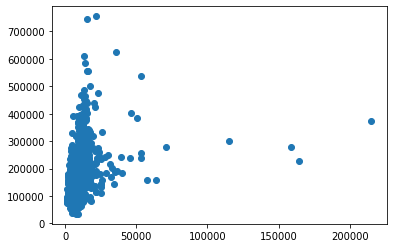

In [177]:
plt.plot(df_conts["LotArea"], df_conts["SalePrice"], 'o')

In [178]:
df_corr_cats=df_cats.corr()

In [179]:
mask = np.zeros_like(df_corr_cats, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

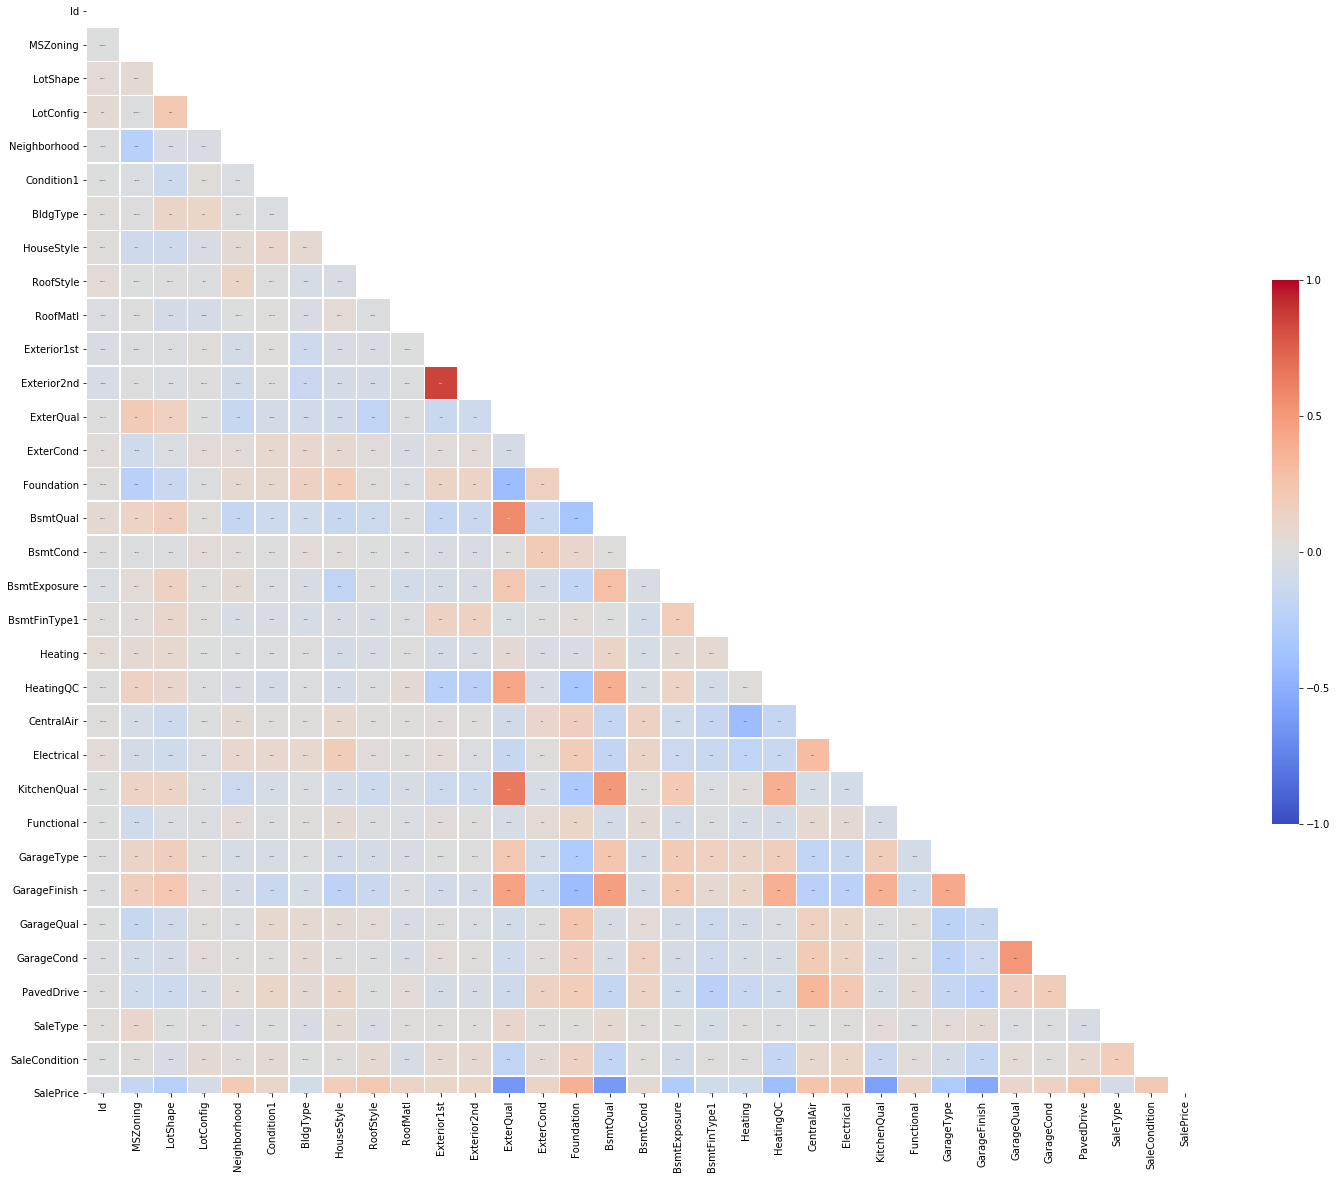

In [180]:
f, ax = plt.subplots(figsize=(25, 25)) 
heatmap = sns.heatmap(df_corr_cats, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4
                                  ,'ticks' : [-1, -.5, 0, 0.5, 1]
                                 },
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 2}
                     )
#add the column names as labels
ax.set_yticklabels(df_corr_cats.columns, rotation = 0)
ax.set_xticklabels(df_corr_cats.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [181]:
df_corr_conts=df_conts.corr()

In [182]:
masks = np.zeros_like(df_corr_conts, dtype=np.bool)
masks[np.triu_indices_from(masks)]= True

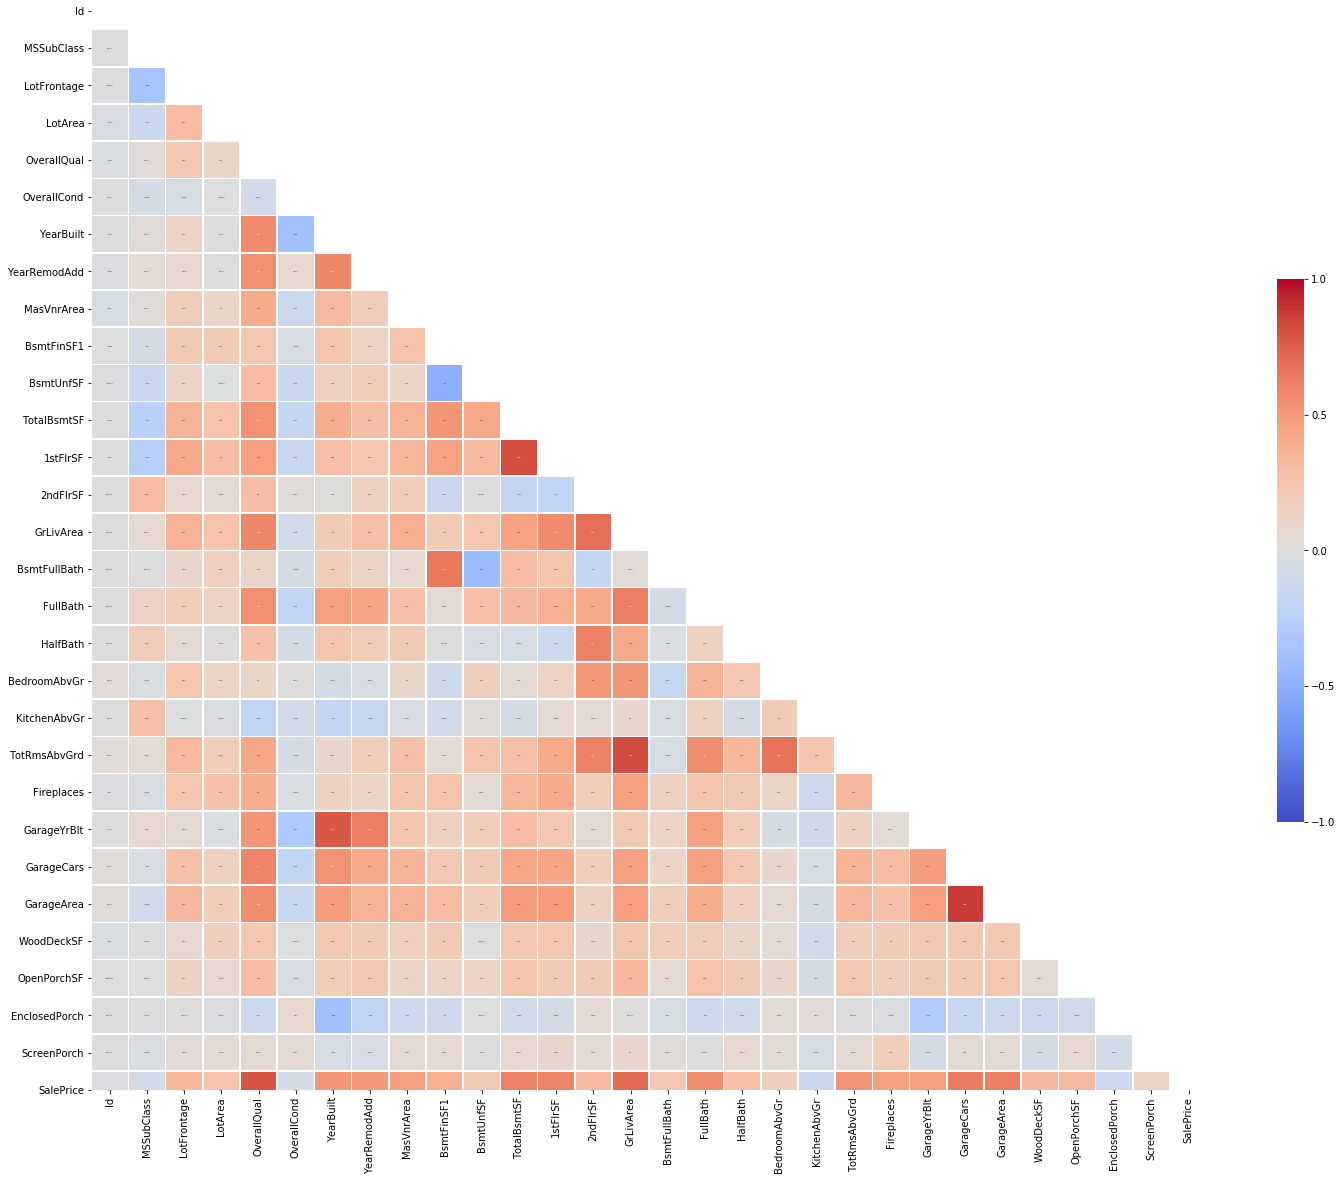

In [183]:
f, ax = plt.subplots(figsize=(25, 25)) 
heatmap = sns.heatmap(df_corr_conts, 
                      mask = masks,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4
                                  ,'ticks' : [-1, -.5, 0, 0.5, 1]
                                 },
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 2}
                     )
#add the column names as labels
ax.set_yticklabels(df_corr_conts.columns, rotation = 0)
ax.set_xticklabels(df_corr_conts.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [184]:
#heatmap.get_figure().savefig('heatmap.png', bbox_inches='tight')

In [185]:
y_cont=df_conts[['SalePrice']]
y_cont.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [186]:
y_cat=df_cats[['SalePrice']]

In [187]:
x_cont=df_conts.drop(columns=['SalePrice'])

In [188]:
x_cat=df_cats.drop(columns=['SalePrice'])

In [189]:
x_cont.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,1,8,0,2003.0,2,548,0,61,0,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,1,6,1,1976.0,2,460,298,0,0,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,1,6,1,2001.0,2,608,0,42,0,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,1,7,1,1998.0,3,642,0,35,272,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,1,9,1,2000.0,3,836,192,84,0,0


In [190]:
lm=LinearRegression()

In [191]:
lm.fit(x_cont,y_cont)
y_hat_cont=lm.predict(x_cont)

In [192]:
lm.fit(x_cat,y_cat)
y_hat_cat=lm.predict(x_cat)

In [193]:
lm.intercept_

array([221172.67959869])

In [194]:
lm.coef_

array([[-2.12757059e+00,  2.00776490e+03, -3.04455495e+03,
        -9.05613336e+02,  1.05718612e+03, -9.98435906e+02,
        -9.70404566e+03,  1.79384086e+03,  8.62467613e+03,
         1.36605302e+04, -1.97987189e+03,  1.50242479e+03,
        -2.51096474e+04,  2.38883700e+03,  3.62878270e+03,
        -2.00226429e+04,  1.42580938e+03, -3.55792052e+03,
        -1.81375697e+03,  7.28902581e+03, -2.01645745e+03,
         2.67841850e+04,  3.07502970e+03, -1.93420008e+04,
         2.97936891e+03, -6.12899411e+02, -1.14430331e+04,
        -9.66273874e+02,  5.88832921e+03,  7.13173627e+03,
        -1.22223352e+03,  3.71677594e+03]])

In [195]:
df_full= pd.merge(df_conts, right=df_cats)
df_full.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,4,2,6,1,1,4,4,2,8,4
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,4,3,6,1,1,4,4,2,8,4
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,4,2,6,1,1,4,4,2,8,4
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,4,2,6,5,2,4,4,2,8,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,4,2,6,1,1,4,4,2,8,4


In [196]:
df_full.shape

(1460, 61)

In [197]:
test_df.shape

(1459, 60)

In [198]:
test_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning            int8
LotFrontage      float64
LotArea            int64
LotShape            int8
LotConfig           int8
Neighborhood        int8
Condition1          int8
BldgType            int8
HouseStyle          int8
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle           int8
RoofMatl            int8
Exterior1st         int8
Exterior2nd         int8
MasVnrArea       float64
ExterQual           int8
ExterCond           int8
Foundation          int8
BsmtQual            int8
BsmtCond            int8
BsmtExposure        int8
BsmtFinType1        int8
BsmtFinSF1       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating             int8
HeatingQC           int8
CentralAir          int8
Electrical          int8
1stFlrSF           int64
2ndFlrSF           int64
GrLivArea          int64
BsmtFullBath     float64
FullBath           int64
HalfBath           int64


In [199]:
y_data=df_full['SalePrice']
y_data

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [200]:
x_data=df_full.drop('SalePrice',axis=1)

In [201]:
x_data.shape

(1460, 60)

In [202]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 292
number of training samples: 1168


In [203]:
df_full.shape

(1460, 61)

In [204]:
df_full.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,...,0.037632,-0.004432,-0.001064,0.000195,-0.011390,-0.003230,-0.018025,0.005971,0.019773,-0.005806
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,...,0.051945,0.010129,0.003711,0.090719,0.012301,0.007630,0.002927,-0.059925,0.012464,-0.024940
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,...,0.060213,-0.189082,0.030250,-0.217793,-0.212056,0.051108,0.043163,0.089073,-0.030846,0.058464
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,...,0.043856,-0.057018,-0.022317,-0.116799,-0.116326,0.017551,0.028106,0.015134,0.012292,0.034169
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,...,0.254127,-0.555348,0.161047,-0.297995,-0.538529,0.090562,0.144988,0.229393,-0.060472,0.193703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GarageQual,-0.003230,0.007630,0.051108,0.017551,0.090562,-0.094761,0.303839,0.130241,0.106678,0.122935,...,0.109257,-0.014551,0.021339,-0.219632,-0.153777,1.000000,0.511375,0.167494,-0.029036,0.046204
GarageCond,-0.018025,0.002927,0.043163,0.028106,0.144988,-0.032236,0.246576,0.150579,0.068356,0.097105,...,0.119467,-0.068412,0.021204,-0.220106,-0.130269,0.511375,1.000000,0.187769,-0.016684,0.018784
PavedDrive,0.005971,-0.059925,0.089073,0.015134,0.229393,-0.062236,0.427561,0.168457,0.145145,0.189545,...,0.213025,-0.050971,0.046994,-0.166480,-0.226045,0.167494,0.187769,1.000000,-0.039365,0.071233
SaleType,0.019773,0.012464,-0.030846,0.012292,-0.060472,0.095267,-0.052425,0.019647,-0.055715,0.005532,...,0.009257,0.038590,-0.008221,0.031879,0.047135,-0.029036,-0.016684,-0.039365,1.000000,0.184067


In [205]:
xgbr = xgb.XGBRegressor(verbosity=0) 
print(xgbr)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)


In [206]:
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [207]:
xgbr.fit(x_train, y_train)
tscore = xgbr.score(x_train, y_train)  
print("Training score: ", tscore)

/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Training score:  0.9622510219781636


In [208]:
print("Test score: ", xgbr.score(x_test, y_test)  )

Test score:  0.9007227966784322


In [209]:
scores = cross_val_score(xgbr, x_train, y_train,cv=10)
print("Mean cross-validation score: %.3f" % scores.mean())

/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/anaconda3/lib/p

Mean cross-validation score: 0.862


In [210]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, x_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/anaconda3/lib/p

K-fold CV average score: 0.88


In [211]:

#Both methods show that the model is around 87 %  accurate on average.

#Next, we can predict test data, then check the prediction accuracy. 
#Here, we'll use MSE and RMSE as accuracy metrics.

ypred = xgbr.predict(x_test)
mse = mean_squared_error(y_test, ypred)
print("MSE: %.2f" % mse)

print("RMSE: %.2f" % np.sqrt(mse))

MSE: 708039392.67
RMSE: 26609.01


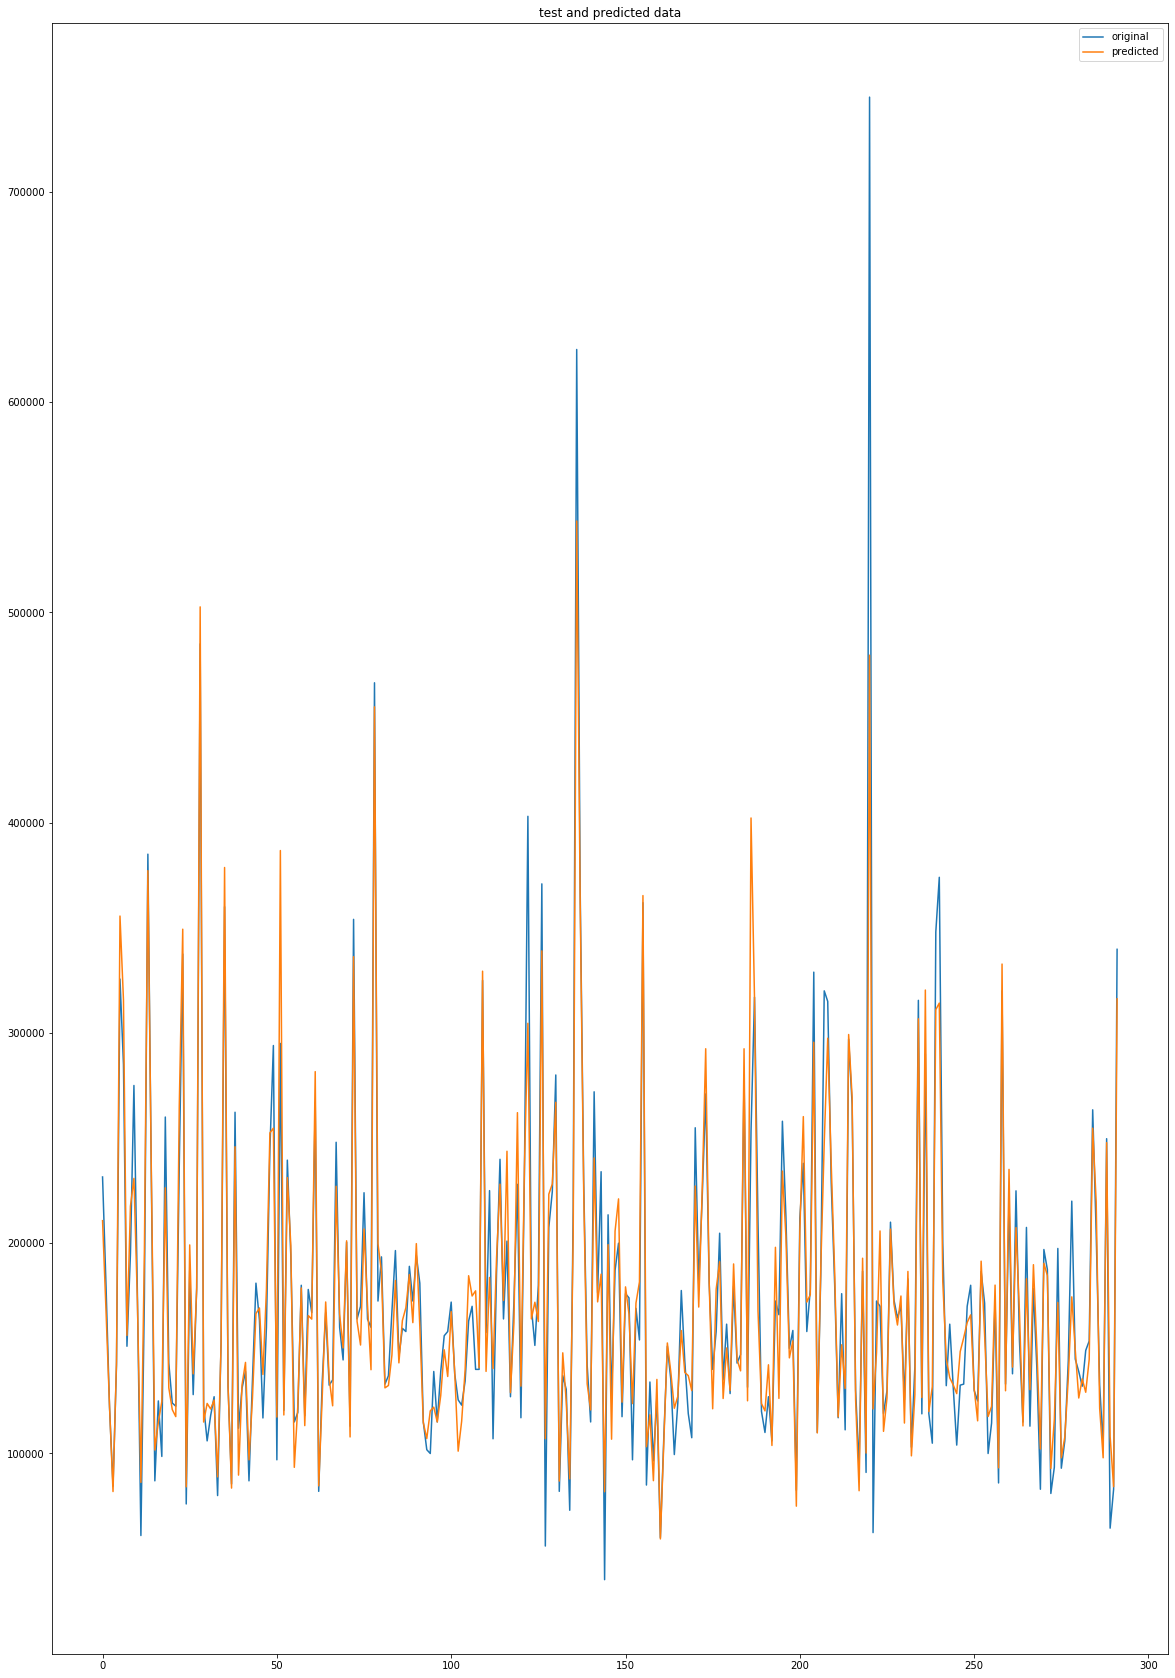

In [212]:
#Finally, we'll visualize the original and predicted test data in a plot to compare visually.
x_ax = range(len(y_test))
plt.figure(figsize=(20,30))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("test and predicted data")
plt.legend()
plt.show()

In [213]:
lgbr = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [214]:
lgbr.fit(x_train, y_train)
tscore = lgbr.score(x_train, y_train)  
print("Training score: ", tscore)

Training score:  0.9723568715838286


In [215]:
l_scores = cross_val_score(lgbr, x_train, y_train,cv=10)
print("Mean cross-validation score: %.3f" % l_scores.mean())

Mean cross-validation score: 0.874


In [216]:
kfold = KFold(n_splits=10, shuffle=True)
l_kf_cv_scores = cross_val_score(lgbr, x_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % l_kf_cv_scores.mean())

K-fold CV average score: 0.85


In [217]:
ypreds = lgbr.predict(x_test)
l_mse = mean_squared_error(y_test, ypreds)
print("MSE: %.2f" % l_mse)

print("RMSE: %.2f" % np.sqrt(l_mse))

MSE: 775226899.29
RMSE: 27842.90


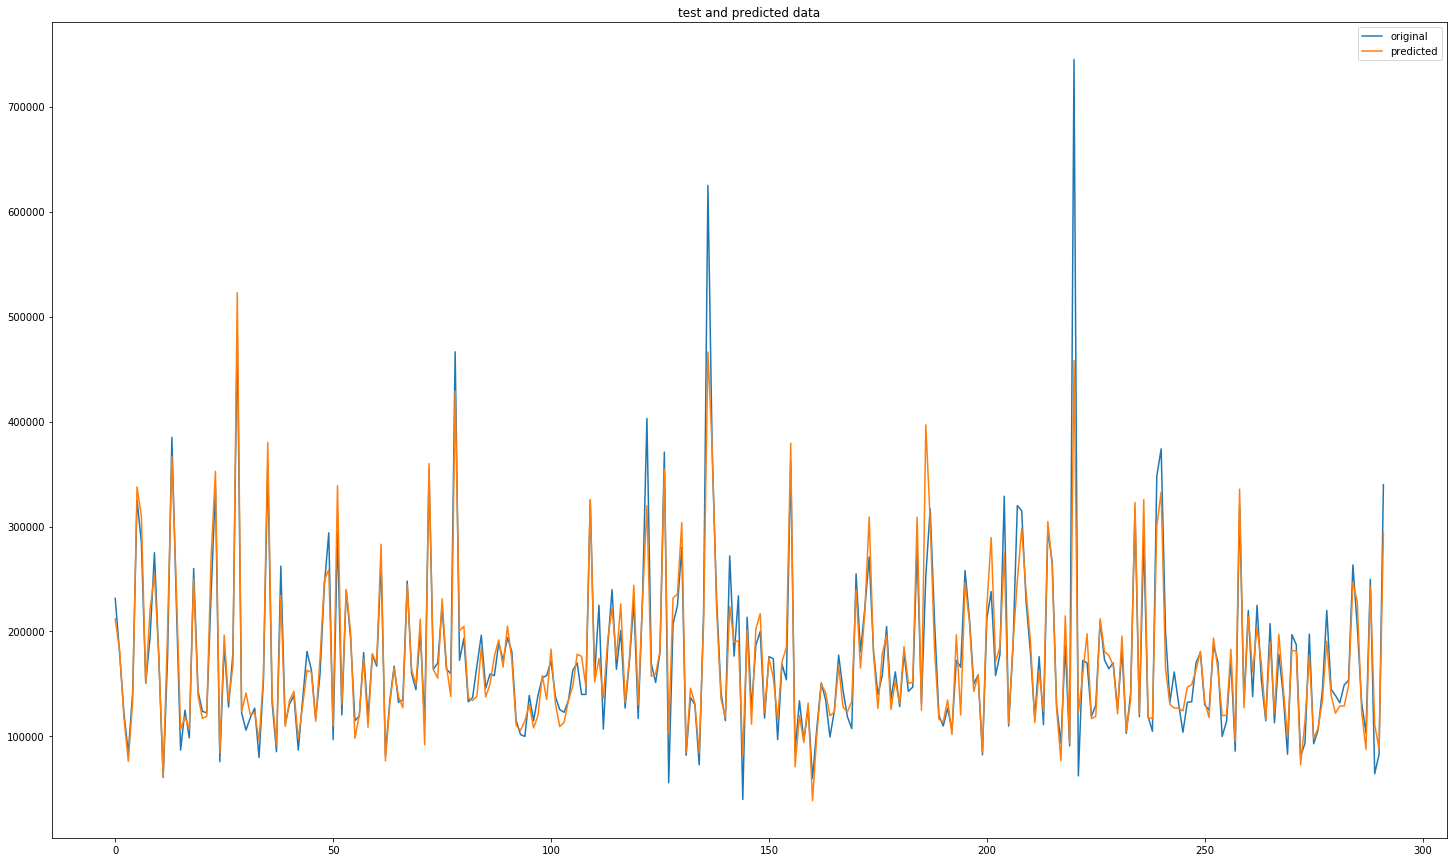

In [218]:
#Finally, we'll visualize the original and predicted test data in a plot to compare visually.
x_axis = range(len(y_test))
plt.figure(figsize=(25,15))
plt.plot(x_axis, y_test, label="original")
plt.plot(x_axis, ypreds, label="predicted")
plt.title("test and predicted data")
plt.legend()
plt.show()

In [219]:
#last part
preds_test = lgbr.predict(test_df)

In [220]:
preds_test

array([188778.68521504, 175100.65172416, 176750.31370917, ...,
       175794.36256252, 176080.84009556, 177983.29702168])

In [221]:

# Create OutPut Data
output = pd.DataFrame({'Id': test_df.Id, 'SalePrice': (preds_test)})

# To CSV
output.to_csv('submission.csv', index=False)

# Show me the data!
output.head()

,Id,SalePrice
0,1461,188778.685215
1,1462,175100.651724
2,1463,176750.313709
3,1464,189393.288338
4,1465,195654.629250


In [222]:
output.describe()

,Id,SalePrice
count,1459.000000,1459.000000
mean,2190.000000,182158.690376
std,421.321334,10014.704032
min,1461.000000,151508.120876
25%,1825.500000,175075.252124
50%,2190.000000,182045.499879
75%,2554.500000,188352.754768
max,2919.000000,222675.213794


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0e1539b50>,
      dtype=object)

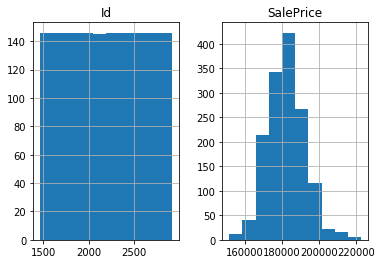

In [223]:
output.hist()

#### I have download data from kaggle, cleaned and analyzed. Since the data had large number of columns, I divided the data into categorical and continuous data. Some of the columns had a lot of missing values so I decided to drop them. For continuous value, I have replace the missing value with the mean and for categorical value, I replace the missing value with the one having higher number of frequency. After finding the correlation to the sale price, I decided to drop the columns that aren't helping that much. At the end I merged the two data into one.

#### I tried simple linear, multiple and polynomial regression, lasso and ridge regression (which are not in this notebook) and xgbregressor and lgbregressor. Out of all, I got the best result with lgbregressor with 97% training score and 87% cross value score.  

#### Finally, I cleaned, analyzed the test data just like the train data. I used the lgbregressor model to the test data to get the final house sale price.

